## ANA630 - Advanced Analytic Applications
### Dave Terando
### Project: Model Analysis for first three feature sets.

In [1]:
# Core
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Data & ML
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn. impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve, 
                             confusion_matrix, classification_report)
from sklearn.dummy import DummyClassifier

# Models
from sklearn. linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import ComplementNB

# Interpretation
from sklearn.inspection import permutation_importance 
import warnings
warnings.filterwarnings("ignore")

pd. set_option("display.max_columns", None)
print(" Imports complete. Random state set to", RANDOM_STATE)

 Imports complete. Random state set to 42


In [2]:
#load fourth_down_df
fourth_down_df = pd.read_csv('fourth_down_dataframe.csv')

fourth_down_df.shape

(3932, 14)

### Iterate through the following three feature sets.

In [3]:
# Select relevant features for clustering/classification
features = ['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining']

In [ ]:
# Select relevant features for clustering/classification
features = ['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining', 'ep']

In [ ]:
# Select relevant features for clustering/classification
features = ['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining', 'wp', 'ep']

In [4]:
X = fourth_down_df[features].fillna(0)  # Basic imputation for missing values
y = fourth_down_df['series_success']  # Binary target (1=success, 0=failure)

print ("Shape:", X. shape)
print("Target distribution (0=no, 1=yes):")
print (y.value_counts())
display(X.head())


Shape: (3932, 5)
Target distribution (0=no, 1=yes):
1.0    2118
0.0    1814
Name: series_success, dtype: int64


,yardline_100,ydstogo,score_differential,game_seconds_remaining,ep
0,1.0,1.0,3.0,2557.0,4.616242
1,16.0,5.0,-4.0,37.0,2.465330
2,34.0,7.0,0.0,3242.0,0.787785
3,10.0,1.0,-17.0,900.0,3.810780
4,69.0,4.0,-7.0,3077.0,-1.202093


#### Baseline Model: Dummy Classifier
This also partitions the dataset into training (80%) and testing (20%) sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)


baseline = DummyClassifier(strategy='most_frequent',random_state=RANDOM_STATE)
baseline.fit(X_train, y_train)
y_base = baseline.predict(X_test)

print("Baseline Accuracy:",accuracy_score (y_test, y_base))
print("\nBaseline Classification Report: \n", classification_report(y_test, y_base, target_names=['no', 'yes']))

Baseline Accuracy: 0.5387547649301143

Baseline Classification Report: 
               precision    recall  f1-score   support

          no       0.00      0.00      0.00       363
         yes       0.54      1.00      0.70       424

    accuracy                           0.54       787
   macro avg       0.27      0.50      0.35       787
weighted avg       0.29      0.54      0.38       787



In [5]:
from sklearn.preprocessing import StandardScaler

# Preprocessing pipeline numeric transformer
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [6]:
# Reusable Evaluation Helpers

def fit_and_scores(model, X_train, y_train, X_test, y_test, name="model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = None
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    metrics = {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_scores) if y_scores is not None else np.nan
    }
    return metrics, y_pred, y_scores

def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    ax. imshow(cm)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(['No', 'Yes']); ax.set_yticklabels(['No','Yes'])
    for i in range (cm.shape[0]): 
        for j in range (cm.shape [1]) :
            ax.text(j, i, cm[i, j], ha="center", va="center")
    plt.show()

def plot_roc_pr_curves(y_true, y_scores, name="model"):
    if y_scores is None:
        print(f"{name}: No probability/decision scores available to plot ROC/PR.")
        return
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt. figure()
    plt. plot(fpr, tpr, label=name)
    plt. plot ([0,1], [0,1], '--')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate") 
    plt. title(f"ROC Curve: {name}"); plt.legend(); plt.show()
    prec, rec, _ = precision_recall_curve(y_true, y_scores)
    plt. figure()
    plt. plot(rec, prec, label=name)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {name}"); plt.legend(); plt.show()


In [7]:
# Establish a list for results from each model
fourth_down_results = []

In [26]:
# to clear results list if needed (every time a model is re-run it adds an iteration to the list)
fourth_down_results.clear()

#### Logistic Regression

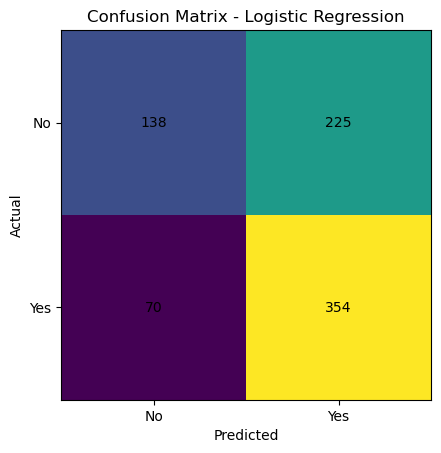

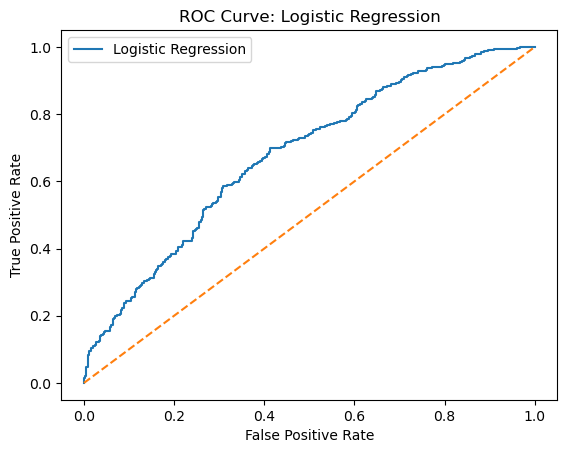

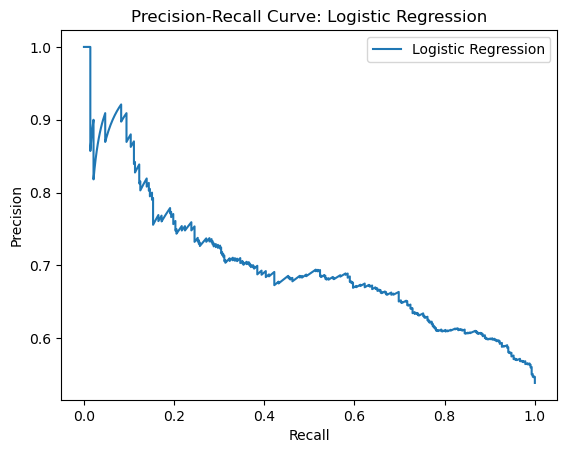

0.625158831003812


In [35]:
# Define the pipeline with the StandardScaler and Logistic Regression
logreg = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, n_jobs=None, random_state=RANDOM_STATE))
])
# The pipeline will automatically call `fit_transform` on the scaler and then `fit` on the classifier.
m, y_pred, y_scores = fit_and_scores(logreg, X_train, y_train, X_test, y_test, "Logistic Regression")
fourth_down_results.append(m)
plot_confusion(y_test, y_pred, "Confusion Matrix - Logistic Regression")
plot_roc_pr_curves(y_test, y_scores, "Logistic Regression")
print(logreg.score(X_test, y_test))

#### k-Nearest Neighbors (k-NN)

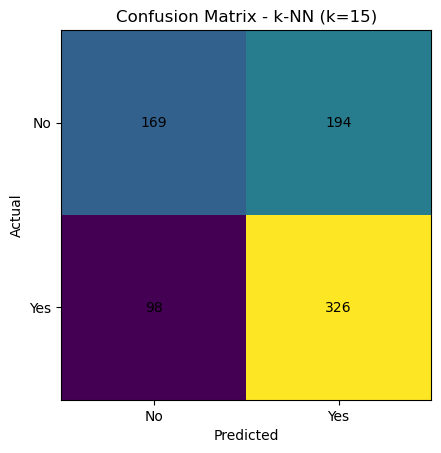

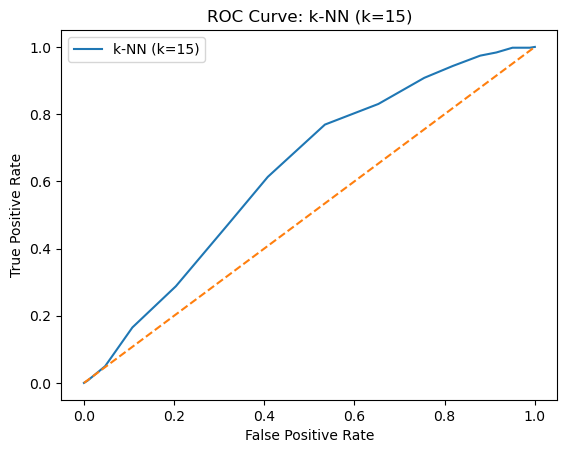

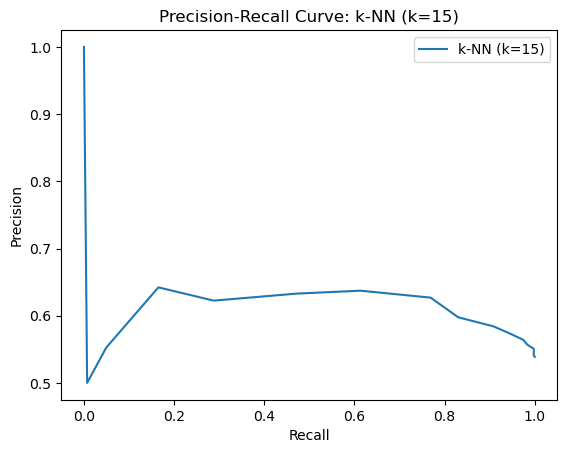

0.6289707750952986


In [28]:
knn = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=15))])
m, y_pred, y_scores = fit_and_scores(knn, X_train, y_train, X_test, y_test, "k-NN (k=15)")
fourth_down_results.append (m)
plot_confusion(y_test, y_pred, "Confusion Matrix - k-NN (k=15)") 
plot_roc_pr_curves(y_test, y_scores, "k-NN (k=15)")
print(knn.score(X_test, y_test))

#### Decision Tree

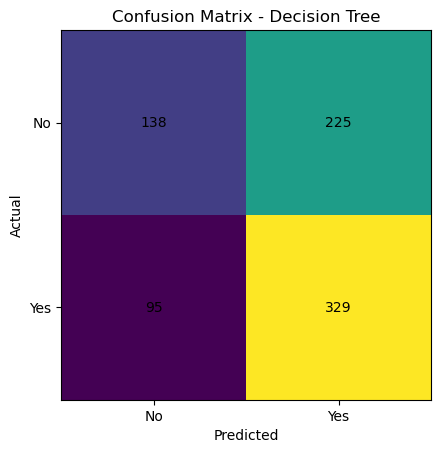

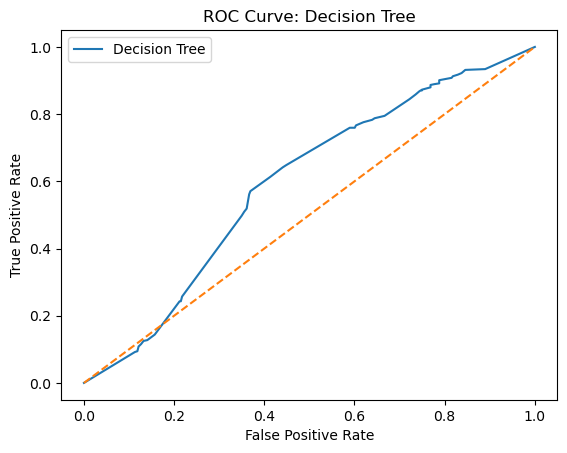

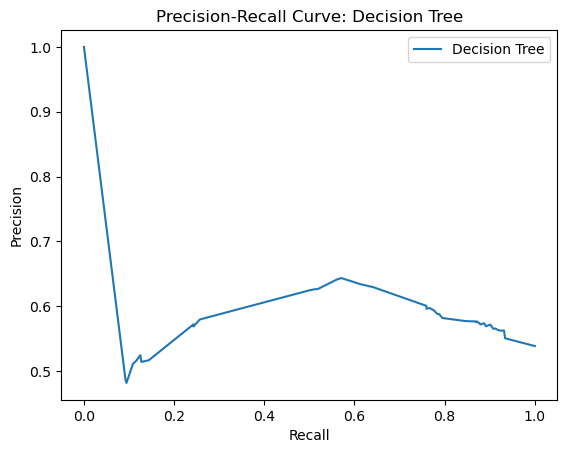

0.5933926302414231


In [29]:
tree = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier (max_depth=10, random_state=RANDOM_STATE))])
m, y_pred, y_scores = fit_and_scores(tree, X_train, y_train, X_test, y_test, "Decision Tree (max_depth=12)")
fourth_down_results.append (m)
plot_confusion(y_test, y_pred, "Confusion Matrix - Decision Tree") 
plot_roc_pr_curves(y_test, y_scores, "Decision Tree")
print(tree.score(X_test, y_test))

#### Random Forest

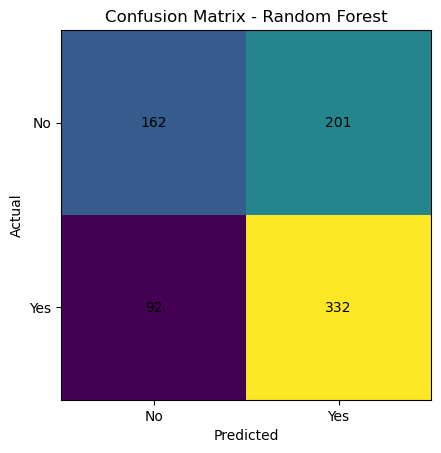

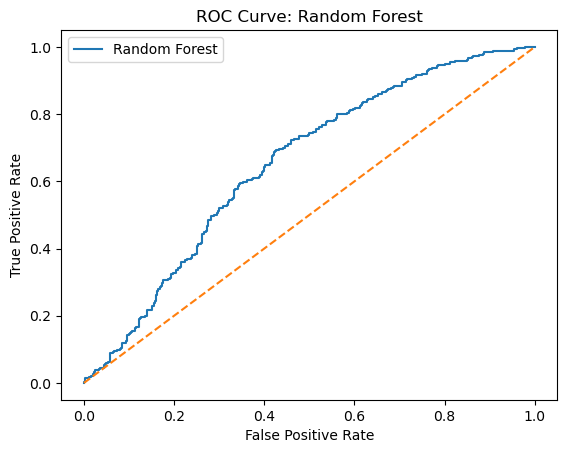

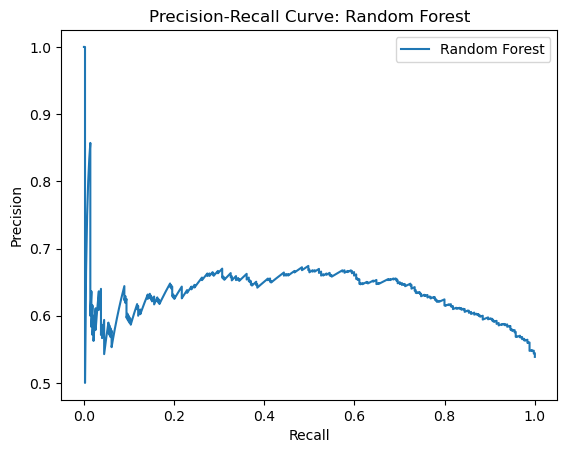

0.627700127064803


In [30]:
rf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=300, max_depth=10, n_jobs=-1, random_state=RANDOM_STATE))])
m, y_pred, y_scores = fit_and_scores(rf, X_train, y_train, X_test, y_test, "Random Forest")
fourth_down_results.append (m)
plot_confusion (y_test, y_pred, "Confusion Matrix - Random Forest") 
plot_roc_pr_curves (y_test, y_scores, "Random Forest")
print(rf.score(X_test, y_test))

#### Support Vector Machine (RBF)

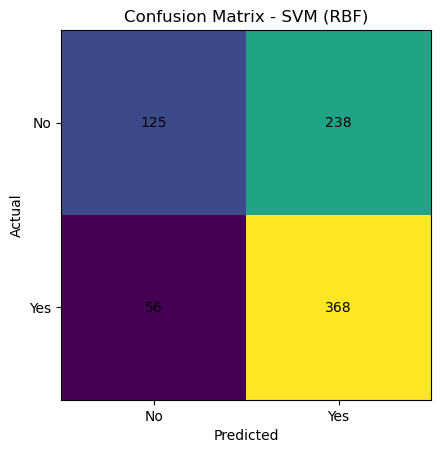

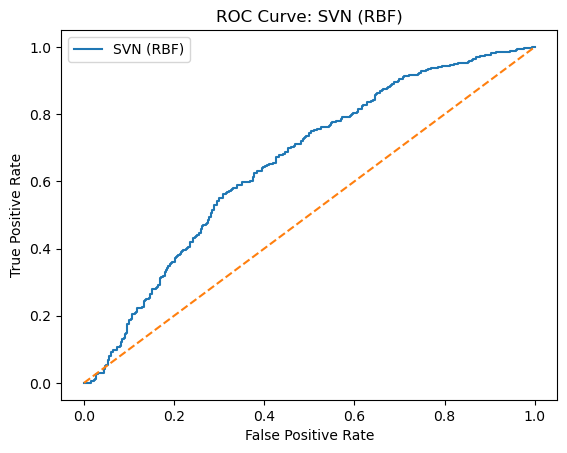

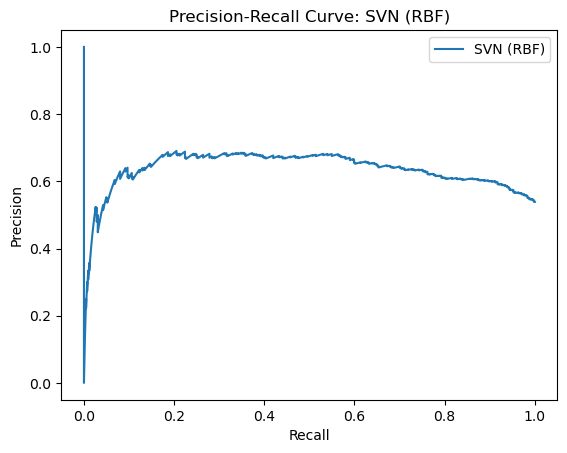

0.6264294790343075


In [31]:
svm_rbf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=False, cache_size=2000, random_state=RANDOM_STATE))])
m, y_pred, y_scores = fit_and_scores(svm_rbf, X_train, y_train, X_test, y_test, "SVM (RBF)")
fourth_down_results.append (m)
plot_confusion(y_test, y_pred, "Confusion Matrix - SVM (RBF)") 
plot_roc_pr_curves(y_test, y_scores, "SVN (RBF)")
print(svm_rbf.score(X_test, y_test))

#### Gradient Boosting

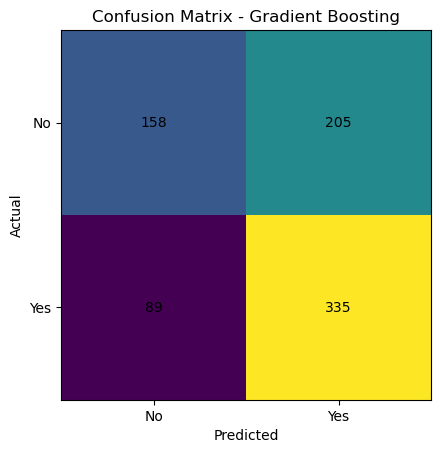

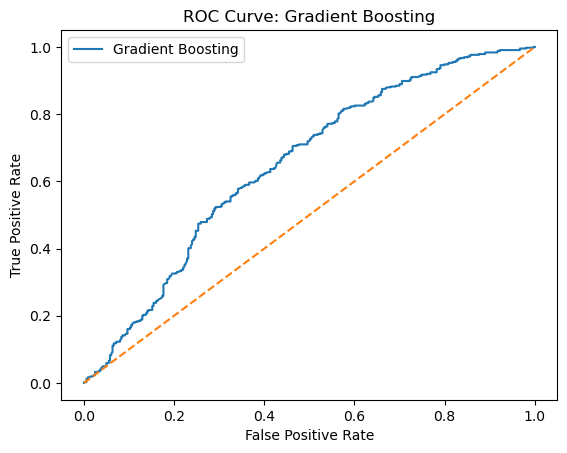

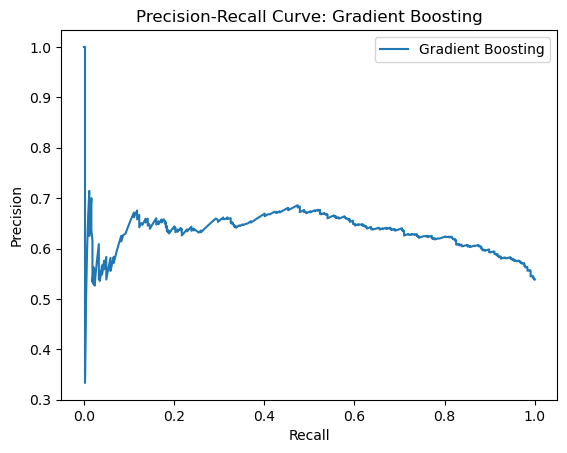

0.6264294790343075


In [32]:
grbt = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier(random_state=RANDOM_STATE))])
m, y_pred, y_scores = fit_and_scores(grbt, X_train, y_train, X_test, y_test, "Gradient Boosting")
fourth_down_results.append (m)
plot_confusion(y_test, y_pred, "Confusion Matrix - Gradient Boosting") 
plot_roc_pr_curves(y_test, y_scores, "Gradient Boosting")
print(grbt.score(X_test, y_test))

#### Model Evaluation Summary
This table will be reproduced for each iteration of models with new feature set.

In [33]:
# Display results list
results_df = pd.DataFrame(fourth_down_results).sort_values(by=['f1', 'roc_auc'], ascending=False)
cols_to_highlight = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
styled = results_df.style.highlight_max(subset=cols_to_highlight, axis=0, color='lightgreen')
display(styled)

,model,accuracy,precision,recall,f1,roc_auc
4,SVM (RBF),0.626429,0.607261,0.867925,0.714563,0.656018
0,Logistic Regression,0.625159,0.611399,0.834906,0.705882,0.678576
5,Gradient Boosting,0.626429,0.620370,0.790094,0.695021,0.649361
3,Random Forest,0.627700,0.622889,0.783019,0.693835,0.650709
1,k-NN (k=15),0.628971,0.626923,0.768868,0.690678,0.628843
2,Decision Tree (max_depth=12),0.593393,0.593863,0.775943,0.672802,0.593531
